In [2]:
#Peter Frick, Stanford University

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

Purpose
To look at the relative distribution of genomic annotations in samples, defined using bedtools.

There are four conditions
control:  This is all the called peaks in the 150624 PC9 scATAC (normal growth media) experiment
erl:      These are all the called peaks in the 150723 PC9 scATAC (+erlotinib 3d) expeirment
upInErl:  Peaks in erlotinib, but not in control. Called using "bedtools intersect -v"
upInCtrl: Peaks in control, but not in erlotinib. Called using "bedtools intersect -v"

0. control
1. erl
2. upInCtrl
3. upInErl

In [3]:
a1=pd.read_csv('ctrlPeakStats.bed',delimiter='\t')
a1=a1.loc[0:9] #only keep the non-zero entries
a1['Condition']='control'
a1.head()

a2=pd.read_csv('erlPeakStats.bed',delimiter='\t')
a2=a2.loc[0:9]
a2['Condition']='erl'
a2

a3=pd.read_csv('upInCtrlPeakStats.bed',delimiter='\t')
a3=a3.loc[0:9]
a3['Condition']='upInCtrl'

a4=pd.read_csv('upInErlpeakStats.bed',delimiter='\t')
a4=a4.loc[0:9]
a4['Condition']='upInErl'

a=pd.concat([a1,a2,a3,a4])

#a[(a.Condition)=='control']
a.head()

,Annotation,Number of peaks,Total size (bp),Log2 Enrichment,Condition
0,3UTR,422.0,21894917,0.226,control
1,miRNA,1.0,48690,0.317,control
2,ncRNA,201.0,5103632,1.257,control
3,TTS,758.0,27937354,0.719,control
4,pseudo,32.0,1828155,0.087,control


Clean up the variables in memory

In [4]:
%reset_selective -f a[1-4]


Calculate the percentage of peaks falling into certain genomic region.

In [5]:
#Helpful site for indexing http://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value

rollingPeaks=[]
a['PerPeaks']=0; PerPeaks=[]
condn=set(a['Condition'])
for i in condn:
    tempPeak = a['Number of peaks'].loc[a['Condition']==i] #Get the right condition
    tempPeak = map(float,tempPeak) #Convert to float
    tempPeak = tempPeak/np.sum(tempPeak)
    rollingPeaks = np.append(rollingPeaks,tempPeak)

a['PerPeaks']=rollingPeaks
a.head()

,Annotation,Number of peaks,Total size (bp),Log2 Enrichment,Condition,PerPeaks
0,3UTR,422.0,21894917,0.226,control,0.00844
1,miRNA,1.0,48690,0.317,control,0.00002
2,ncRNA,201.0,5103632,1.257,control,0.00402
3,TTS,758.0,27937354,0.719,control,0.01516
4,pseudo,32.0,1828155,0.087,control,0.00064


In [6]:
print np.arange(len(condn))*0.4
np.arange(len(condn))

[ 0.   0.4  0.8  1.2]


array([0, 1, 2, 3])

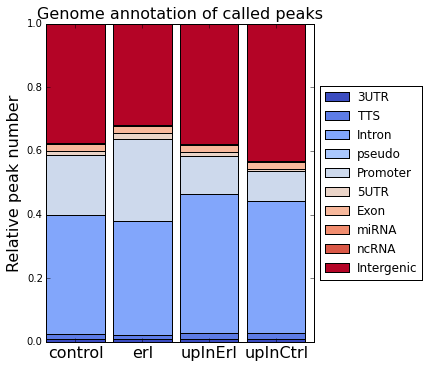

In [42]:
#Works

#Documentation for adding color
# http://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
#Documentation for adding legend
#http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

fig = plt.figure(figsize=(6,6), dpi=1600)
ax = plt.subplot(111)

annoIdx = set(a['Annotation'])
condnIdx = np.arange(len(condn))*0.4   # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

x = np.arange(len(condnIdx))
ys = [i+x+(i*x)**2 for i in range(10)]

#colors = cm.rainbow(np.linspace(0, 1, len(ys)))
colors = cm.coolwarm(np.linspace(0, 1, len(ys)))



rollBottom = np.repeat(0,len(condn)) #Create an index so the bars are stacked on top of each other
colIdx = 0
for i in annoIdx:
    ax.bar(condnIdx, a['PerPeaks'][a['Annotation']==i], width, color=colors[colIdx],bottom=rollBottom)
    rollBottom = rollBottom + list(a['PerPeaks'][a['Annotation']==i])
    colIdx = colIdx + 1

plt.ylabel('Relative peak number',fontsize=16)
plt.title('Genome annotation of called peaks',fontsize=16)
plt.xticks(condnIdx+width/2., [i for i in condn],fontsize=16)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height*0.95])
# Put a legend to the right of the current axis
ax.legend([i for i in annoIdx],loc='center left', bbox_to_anchor=(1, 0.5))
ax.set

plt.show()